In [1]:
import io, os

from google.cloud import videointelligence as videointelligence
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:/Users/felip/Video/video.json"

from google.cloud import videointelligence_v1 as videointelligence


def detect_faces(gcs_uri="gs://redoga/Coles - Chicken Drumsticks and Salad 15 TVC.mp4"):
    
    """Detects faces in a video."""

    client = videointelligence.VideoIntelligenceServiceClient()

    # Configure the request
    config = videointelligence.FaceDetectionConfig(
        include_bounding_boxes=True, include_attributes=True
    )
    context = videointelligence.VideoContext(face_detection_config=config)

    # Start the asynchronous request
    operation = client.annotate_video(
        request={
            "features": [videointelligence.Feature.FACE_DETECTION],
            "input_uri": gcs_uri,
            "video_context": context,
        }
    )

    print("\nProcessing video for face detection annotations.")
    result = operation.result(timeout=300)

    print("\nFinished processing.\n")

    # Retrieve the first result, because a single video was processed.
    annotation_result = result.annotation_results[0]

    for annotation in annotation_result.face_detection_annotations:
        print("Face detected:")
        for track in annotation.tracks:
            print(
                "Segment: {}s to {}s".format(
                    track.segment.start_time_offset.seconds
                    + track.segment.start_time_offset.microseconds / 1e6,
                    track.segment.end_time_offset.seconds
                    + track.segment.end_time_offset.microseconds / 1e6,
                )
            )

            # Each segment includes timestamped faces that include
            # characteristics of the face detected.
            # Grab the first timestamped face
            timestamped_object = track.timestamped_objects[0]
            box = timestamped_object.normalized_bounding_box
            print("Bounding box:")
            print("\tleft  : {}".format(box.left))
            print("\ttop   : {}".format(box.top))
            print("\tright : {}".format(box.right))
            print("\tbottom: {}".format(box.bottom))

            # Attributes include glasses, headwear, smiling, direction of gaze
            print("Attributes:")
            for attribute in timestamped_object.attributes:
                print(
                    "\t{}:{} {}".format(
                        attribute.name, attribute.value, attribute.confidence
                    )
                )

In [2]:
##results
detect_faces()


Processing video for face detection annotations.

Finished processing.

Face detected:
Segment: 12.36s to 13.32s
Bounding box:
	left  : 0.7656000256538391
	top   : 0.2583000063896179
	right : 0.9061999917030334
	bottom: 0.5490999817848206
Attributes:
	smiling: 0.0673668161034584
	mouth_open: 0.3887190520763397
	eyes_visible: 0.018706273287534714
	looking_at_camera: 0.0013148135039955378
	glasses: 0.015398826450109482
	headwear: 0.003365893382579088
Face detected:
Segment: 12.36s to 13.32s
Bounding box:
	left  : 0.24009999632835388
	top   : 0.18240000307559967
	right : 0.36719998717308044
	bottom: 0.44440001249313354
Attributes:
	smiling: 0.9561442732810974
	mouth_open: 0.05222175270318985
	eyes_visible: 0.5599380731582642
	looking_at_camera: 0.04087596386671066
	glasses: 0.011803577654063702
	headwear: 0.04902491718530655
Face detected:
Segment: 4.92s to 5.52s
Bounding box:
	left  : 0.4140999913215637
	top   : 0.0
	right : 0.6978999972343445
	bottom: 0.5407000184059143
Attributes:
	ey

Second example

In [14]:
import io, os

from google.cloud import videointelligence as videointelligence
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:/Users/felip/Video/video.json"

from google.cloud import videointelligence_v1 as videointelligence


def detect_faces(gcs_uri="gs://redoga/Hungry Jack's Coffee 15s TVC.mp4"):
    
    """Detects faces in a video."""

    client = videointelligence.VideoIntelligenceServiceClient()

    # Configure the request
    config = videointelligence.FaceDetectionConfig(
        include_bounding_boxes=True, include_attributes=True
    )
    context = videointelligence.VideoContext(face_detection_config=config)

    # Start the asynchronous request
    operation = client.annotate_video(
        request={
            "features": [videointelligence.Feature.FACE_DETECTION],
            "input_uri": gcs_uri,
            "video_context": context,
        }
    )

    print("\nProcessing video for face detection annotations.")
    result = operation.result(timeout=300)

    print("\nFinished processing.\n")

    # Retrieve the first result, because a single video was processed.
    annotation_result = result.annotation_results[0]

    for annotation in annotation_result.face_detection_annotations:
        print("Face detected:")
        for track in annotation.tracks:
            print(
                "Segment: {}s to {}s".format(
                    track.segment.start_time_offset.seconds
                    + track.segment.start_time_offset.microseconds / 1e6,
                    track.segment.end_time_offset.seconds
                    + track.segment.end_time_offset.microseconds / 1e6,
                )
            )

            # Each segment includes timestamped faces that include
            # characteristics of the face detected.
            # Grab the first timestamped face
            timestamped_object = track.timestamped_objects[0]
            box = timestamped_object.normalized_bounding_box
            print("Bounding box:")
            print("\tleft  : {}".format(box.left))
            print("\ttop   : {}".format(box.top))
            print("\tright : {}".format(box.right))
            print("\tbottom: {}".format(box.bottom))

            # Attributes include glasses, headwear, smiling, direction of gaze
            print("Attributes:")
            for attribute in timestamped_object.attributes:
                print(
                    "\t{}:{} {}".format(
                        attribute.name, attribute.value, attribute.confidence
                    )
                )

In [15]:
detect_faces()


Processing video for face detection annotations.

Finished processing.

Face detected:
Segment: 9.36s to 11.88s
Bounding box:
	left  : 0.6891000270843506
	top   : 0.19349999725818634
	right : 0.8525999784469604
	bottom: 0.5306000113487244
Attributes:
	glasses: 0.16305230557918549
	headwear: 0.07386670261621475
	eyes_visible: 0.5459265112876892
	mouth_open: 0.026397185400128365
	looking_at_camera: 0.05309302359819412
	smiling: 0.17870455980300903
Face detected:
Segment: 9.36s to 11.88s
Bounding box:
	left  : 0.13539999723434448
	top   : 0.11299999803304672
	right : 0.3156000077724457
	bottom: 0.48330000042915344
Attributes:
	glasses: 0.018971005454659462
	headwear: 0.005488894414156675
	eyes_visible: 0.3966198265552521
	mouth_open: 0.017202522605657578
	looking_at_camera: 0.02030651830136776
	smiling: 0.00011147722398163751
Face detected:
Segment: 3.6s to 4.92s
Bounding box:
	left  : 0.2572999894618988
	top   : 0.05559999868273735
	right : 0.5390999913215637
	bottom: 0.6388999819755554

In [5]:
import matplotlib.pyplot as plt

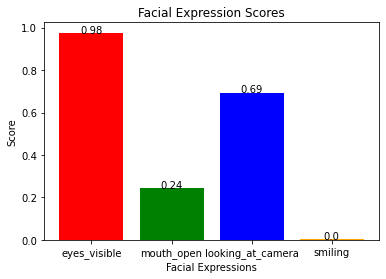

In [10]:
import matplotlib.pyplot as plt

# Define the values to plot
values = [0.9753464460372925, 0.24261705577373505, 0.6937441229820251, 0.0038789708632975817]
labels = ['eyes_visible', 'mouth_open', 'looking_at_camera', 'smiling']

# Define the colors for the bars
colors = ['red', 'green', 'blue', 'orange']

# Create a bar chart with the specified colors
plt.bar(labels, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v, str(round(v, 2)), ha='center')

# Set the title and axis labels
plt.title('Facial Expression Scores')
plt.xlabel('Facial Expressions')
plt.ylabel('Score')

# Show the plot
plt.show()

Add more emotions, see Face emotions code

Napats code for celebrity 

In [2]:
import io, os

from google.cloud import videointelligence as videointelligence
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:/Users/felip/Video/video.json"

from google.cloud import videointelligence_v1 as videointelligence

def detect_faces( gcs_uri="gs://redoga/Coles - Chicken Drumsticks and Salad 15 TVC.mp4"):
    #Detects faces in a video.
    config = videointelligence.FaceDetectionConfig(
        include_bounding_boxes=True, include_attributes=True
    )
    context = videointelligence.VideoContext(face_detection_config=config)

    operation = client.annotate_video(
        request={
          "features": [videointelligence.Feature.FACE_DETECTION],
          "input_uri": gcs_uri,
          "video_context": context,
        }
    )

    print("\nProcessing video for face detection annotations.")

    annotation_result = result.annotation_results[0]

    for annotation in annotation_result.face_detection_annotations:
        print("Face detected:")
        for track in annotation.tracks:
            print(
                "Segment: {}s to {}s".format(
                   track.segment.start_time_offset.seconds
                   + track.segment.start_time_offset.microseconds / 1e6,
                   track.segment.end_time_offset.seconds
                   + track.segment.end_time_offset.microseconds / 1e6,
            )      
            )
    timestamped_object = track.timestamped_objects[0]
    box = timestamped_object.normalized_bounding_box
    print("Bounding box:")
    print("\tleft : {}".format(box.left))
    print("\ttop   : {}".format(box.top))
    print("\tright : {}".format(box.right))
    print("\tbottom: {}".format(box.bottom))
    # Attributes include glasses, headwear, smiling, direction of gaze
    print("Attributes:")
    for attribute in timestamped_object.attributes:
        print(
               "\t{}:{} {}".format(
             attribute.name, attribute.value, attribute.confidence
               )
                 )               